In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [25]:
df = pd.read_csv('tmbd_file.csv')

In [26]:
print ("Number of columns", df.shape[1])

Number of columns 21


In [27]:
print ("Number of rows", df.shape[0])

Number of rows 10866


In [28]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [29]:
df.describe()

ID    POPULARITY        BUDGET       REVENUE       RUNTIME  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         VOTE_COUNT  VOTE_AVERAGE  RELEASE_YEAR    BUDGET_ADJ   REVENUE_ADJ  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

# 1. Drop Irrelevant Columns 
#### I deleted irrelevant columns such as  “Tagline”, “Homepage”, “Budget Adj”, “Revenue Adj”, “ID”, “Release Date” and “IMDB ID”.

In [30]:
df.drop(columns=['ID','TAGLINE','HOMEPAGE','BUDGET_ADJ','REVENUE_ADJ','IMDB ID'],axis=1,inplace=True)

# 2. Seperate Date
#### I separated the date column to ‘year’, ‘month’, and ‘day’ to make it easier use.


In [31]:
df["Date"]= pd.to_datetime(df.REALEASE_DATE)
df["Date"]

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day_of_week"] = df["Date"].dt.dayofweek
df.head()

POPULARITY     BUDGET     REVENUE                ORIGINAL TITLE  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                CAST          DIRECTOR  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            KEYWORDS  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            OVERVIEW  RUNTIME  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      GENRES  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                PRODUCTION COMPANIES REALEASE_DATE  \
0  Universal Studios|Amblin Entertainment|Legenda...        6/9/15   
1  Village Roadshow Pictures|Kennedy Miller Produ...       5/13/15   
2  Summit Entertainment|Mandeville Films|Red Wago...       3/18/15   
3          Lucasfilm|Truenorth Productions|Bad Robot      12/15/15   
4  Universal Pictures|Original Film|Media Rights ...        4/1/15   

   VOTE_COUNT  VOTE_AVERAGE  RELEASE_YEAR       Date  Year  Month  Day_of_week  
0        5562           6.5          2015 2015-06-09  2015      6            1  
1        6185           7.1          2015 2015-05-13  2015      5            2  
2        2480           6.3          2015 2015-03-18  2015      3            2  
3        5292           7.5          2015 2015-12-15  2015     12            1  
4        2947           7.3          2015 2015-04-01  2015      4            2

In [32]:
df.columns

Index(['POPULARITY', 'BUDGET', 'REVENUE', 'ORIGINAL TITLE', 'CAST', 'DIRECTOR',
       'KEYWORDS', 'OVERVIEW', 'RUNTIME', 'GENRES', 'PRODUCTION COMPANIES',
       'REALEASE_DATE', 'VOTE_COUNT', 'VOTE_AVERAGE', 'RELEASE_YEAR', 'Date',
       'Year', 'Month', 'Day_of_week'],
      dtype='object')

In [33]:
#null
df.isnull().sum().sum()

2670

In [34]:
df.groupby('REALEASE_DATE') ['VOTE_COUNT'].mean().sort_values(ascending=False)

REALEASE_DATE
7/14/10     9767.0
4/25/12     8903.0
11/26/12    6417.0
5/13/15     6185.0
10/14/99    5923.0
             ...  
2/28/15       10.0
10/18/97      10.0
11/22/85      10.0
10/18/15      10.0
11/22/98      10.0
Name: VOTE_COUNT, Length: 5909, dtype: float64

In [35]:
df.columns

Index(['POPULARITY', 'BUDGET', 'REVENUE', 'ORIGINAL TITLE', 'CAST', 'DIRECTOR',
       'KEYWORDS', 'OVERVIEW', 'RUNTIME', 'GENRES', 'PRODUCTION COMPANIES',
       'REALEASE_DATE', 'VOTE_COUNT', 'VOTE_AVERAGE', 'RELEASE_YEAR', 'Date',
       'Year', 'Month', 'Day_of_week'],
      dtype='object')

# 3. What Are The Top 10 Most Popular Movies And Their Genre's ?

In [36]:
#top 10 most popular movies
top_10 = df.sort_values(by = 'POPULARITY', ascending = False).head(10)
top_10

POPULARITY     BUDGET     REVENUE  \
0      32.985763  150000000  1513528810   
1      28.419936  150000000   378436354   
629    24.949134  165000000   621752480   
630    14.311205  170000000   773312399   
2      13.112507  110000000   295238201   
631    12.971027  170000000   714766572   
1329   12.037933   11000000   775398007   
632    11.422751   20000000    78739897   
3      11.173104  200000000  2068178225   
633    10.739009  125000000   752100229   

                             ORIGINAL TITLE  \
0                            Jurassic World   
1                        Mad Max: Fury Road   
629                            Interstellar   
630                 Guardians of the Galaxy   
2                                 Insurgent   
631     Captain America: The Winter Soldier   
1329                              Star Wars   
632                               John Wick   
3              Star Wars: The Force Awakens   
633   The Hunger Games: Mockingjay - Part 1   

                                                   CAST  \
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1     Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
629   Matthew McConaughey|Jessica Chastain|Anne Hath...   
630   Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
2     Shailene Woodley|Theo James|Kate Winslet|Ansel...   
631   Chris Evans|Scarlett Johansson|Sebastian Stan|...   
1329  Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   
632   Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
633   Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   

                         DIRECTOR  \
0                 Colin Trevorrow   
1                   George Miller   
629             Christopher Nolan   
630                    James Gunn   
2                Robert Schwentke   
631       Joe Russo|Anthony Russo   
1329                 George Lucas   
632   Chad Stahelski|David Leitch   
3                     J.J. Abrams   
633              Francis Lawrence   

                                               KEYWORDS  \
0     monster|dna|tyrannosaurus rex|velociraptor|island   
1      future|chase|post-apocalyptic|dystopia|australia   
629   saving the world|artificial intelligence|fathe...   
630   marvel comic|spaceship|space|scene during end ...   
2     based on novel|revolution|dystopia|sequel|dyst...   
631    washington d.c.|future|shield|marvel comic|comic   
1329        android|galaxy|hermit|death star|lightsaber   
632                  hitman|revenge|murder|gangster|dog   
3                 android|spaceship|jedi|space opera|3d   
633     resistance|post-apocalyptic|dystopia|war|sequel   

                                               OVERVIEW  RUNTIME  \
0     Twenty-two years after the events of Jurassic ...      124   
1     An apocalyptic story set in the furthest reach...      120   
629   Interstellar chronicles the adventures of a gr...      169   
630   Light years from Earth, 26 years after being a...      121   
2     Beatrice Prior must confront her inner demons ...      119   
631   After the cataclysmic events in New York with ...      136   
1329  Princess Leia is captured and held hostage by ...      121   
632   After the sudden death of his beloved wife, Jo...      101   
3     Thirty years after defeating the Galactic Empi...      136   
633   Katniss Everdeen reluctantly becomes the symbo...      123   

                                         GENRES  \
0     Action|Adventure|Science Fiction|Thriller   
1     Action|Adventure|Science Fiction|Thriller   
629             Adventure|Drama|Science Fiction   
630            Action|Science Fiction|Adventure   
2            Adventure|Science Fiction|Thriller   
631            Action|Adventure|Science Fiction   
1329           Adventure|Action|Science Fiction   
632                             Action|Thriller   
3      Action|Adventure|Science Fiction|Fantasy   
633          Science Fiction|Adventure|Thriller

In [37]:
top_10 = df[["VOTE_COUNT", "ORIGINAL TITLE", "GENRES", "Year"]].sort_values(["VOTE_COUNT"], ascending=False)[:10]
top_10
fig = px.scatter(top_10, y= 'ORIGINAL TITLE', x='VOTE_COUNT', hover_data = top_10[['GENRES', 'Year']], color='GENRES',
                 title = "Top 10 Most Popular Movies")
fig.show()

# 4. What Are The Top 10 Least Popular Movies ?

In [38]:
#top 10 least popular movies
top_10_least = df.sort_values(by = 'POPULARITY', ascending = True).head(10)
top_10_least

POPULARITY  BUDGET  REVENUE              ORIGINAL TITLE  \
6181    0.000065       0        0     North and South, Book I   
9977    0.000188       0        0                The Hospital   
6080    0.000620       0        0                      G.B.F.   
6551    0.000973       0        0  Mon petit doigt m'a dit...   
6961    0.001115       0        0           Khosla Ka Ghosla!   
7268    0.001117  350000  3515061          Born into Brothels   
7256    0.001315       0        0                   SoupÃ§ons   
3370    0.001317       0        0              Fuera de carta   
2874    0.001349  165000        0                    Slashers   
4948    0.001372       0        0           The Invisible War   

                                                   CAST  \
6181  Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...   
9977  George C. Scott|Diana Rigg|Richard Dysart|Barn...   
6080  Michael J. Willett|Paul Iacono|Sasha Pieterse|...   
6551  Catherine Frot|AndrÃ© Dussollier|GeneviÃ¨ve Bu...   
6961  Anupam Kher|Boman Irani|Parvin Dabas|Tara Shar...   
7268         Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni   
7256                                   Michael Peterson   
3370  Javier CÃ¡mara|Lola DueÃ±as|Fernando Tejero|Be...   
2874                               Tony Curtis Blondell   
4948  Kori Cioca|Jessica Hinves|Ariana Klay|Elle Hel...   

                       DIRECTOR  \
6181                        NaN   
9977              Arthur Hiller   
6080               Darren Stein   
6551              Pascal Thomas   
6961           Dibakar Banerjee   
7268  Zana Briski|Ross Kauffman   
7256    Jean-Xavier de Lestrade   
3370           Nacho G. Velilla   
2874          Maurice Devereaux   
4948                 Kirby Dick   

                                               KEYWORDS  \
6181                                                NaN   
9977                                hospital|malpratice   
6080        gay|gay kiss|coming out|high school|friends   
6551                                                NaN   
6961                                          bollywood   
7268  prostitute|red-light disctrict|human trafficki...   
7256                                                NaN   
3370                                                NaN   
2874                                                NaN   
4948  post traumatic stress  disorder|rape|sexism|ra...   

                                               OVERVIEW  RUNTIME  \
6181  Two friends, one northern and one southern, st...      561   
9977  Black comedy in which a suicidal doctor strugg...      103   
6080  The bitter fight for supremacy between the thr...       92   
6551                                 No overview found.      105   
6961  Upon retirement, cranky control freak Kamal Ki...      135   
7268  The academy award winning documentary depictin...       85   
7256  Academy Award-winning documentary filmmaker, J...      360   
3370  Maxi thinks is life is perfect. He is a famous...      111   
2874  Japan's number one extreme reality show is hav...       99   
4948  An investigative and powerfully emotional docu...       93   

                               GENRES  \
6181            Drama|History|Western   
9977             Mystery|Comedy|Drama   
6080                           Comedy   
6551                   Comedy|Mystery   
6961                           Comedy   
7268                      Documentary   
7256                Drama|Documentary   
3370                           Comedy   
2874            Comedy|Horror|Fantasy   
4948  Crime|Drama|History|Documentary   

                                   PRODUCTION COMPANIES REALEASE_DATE  \
6181                                                NaN       11/3/85   
9977                                 Simcha Productions      12/14/71   
6080  School Pictures|Parting Shots Media|Logolite E...      10/20/13   
6551               RhÃ´ne-Alpes CinÃ©ma|France2 CinÃ©ma       4/13/05   
6961                                UT

In [39]:
top_10 = df[["VOTE_COUNT", "ORIGINAL TITLE", "GENRES", "REALEASE_DATE"]].sort_values(["VOTE_COUNT"], ascending=True)[:10]
top_10
fig = px.scatter(top_10, y= 'ORIGINAL TITLE', x='VOTE_COUNT', hover_data = top_10[['GENRES', 'REALEASE_DATE']], color='GENRES',
                 title = "Top 10 Most Popular Movies")
fig.show()

# 5. Who Are The Top 5 Directors With The Highest Revenue ?

In [40]:
#directers with the highest revenue
top_directors_revenue = df.sort_values(by='REVENUE',ascending = False)
top_directors_revenue[['ORIGINAL TITLE','DIRECTOR','REVENUE','VOTE_AVERAGE']].head(5)

ORIGINAL TITLE         DIRECTOR     REVENUE  VOTE_AVERAGE
1386                        Avatar    James Cameron  2781505847           7.1
3     Star Wars: The Force Awakens      J.J. Abrams  2068178225           7.5
5231                       Titanic    James Cameron  1845034188           7.3
4361                  The Avengers      Joss Whedon  1519557910           7.3
0                   Jurassic World  Colin Trevorrow  1513528810           6.5

In [41]:
name = ['Avatar', 'Star Wars: The Force Awakens','Titanic','The Avengers','Jurassic World']
direc= ['James Cameron', 'J.J. Abrams','James Cameron','Joss Whedon','Colin Trevorrow'] 
rev= [2781505847, 2068178225, 1845034188, 1519557910, 1513528810]
vote= [7.1,7.5,7.3,7.3,6.5]
df = pd.DataFrame(list(zip(name, direc,rev,vote)),columns =['ORIGINAL TITLE','DIRECTOR','REVENUE','VOTE_AVERAGE'])
df

ORIGINAL TITLE         DIRECTOR     REVENUE  VOTE_AVERAGE
0                        Avatar    James Cameron  2781505847           7.1
1  Star Wars: The Force Awakens      J.J. Abrams  2068178225           7.5
2                       Titanic    James Cameron  1845034188           7.3
3                  The Avengers      Joss Whedon  1519557910           7.3
4                Jurassic World  Colin Trevorrow  1513528810           6.5

In [42]:
ypos= np.arange(len(rev))
ypos;

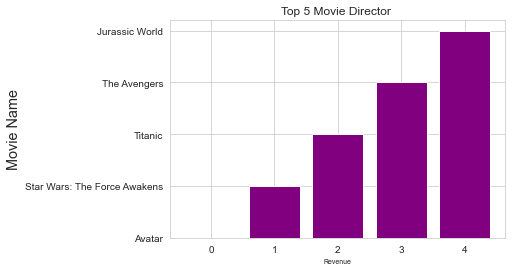

In [43]:
plt.bar(ypos,name, color=(0.5,0.0,0.5,1.0))
plt.title('Top 5 Movie Director ')
plt.xlabel('Revenue', size='x-small')
plt.ylabel('Movie Name', size='x-large');

# 6. What Are The Movies With The Highest Runtime And Their Vote Average ?

In [44]:
lst = ['The Warriors Way', 'Pirates of the Caribbean: On Stranger Tides','Pirates of the Caribbean: At Worlds End','Avengers: Age of Ultron','Superman Returns']
lst2= [900, 877,705,566,561] 
lst3= [9.2, 6.8, 8.0, 8.3, 6.0]
df = pd.DataFrame(list(zip(lst, lst2,lst3)),columns =['ORIGINAL TITLE','RUNTIME','VOTE_AVERAGE'])
df

ORIGINAL TITLE  RUNTIME  VOTE_AVERAGE
0                             The Warriors Way      900           9.2
1  Pirates of the Caribbean: On Stranger Tides      877           6.8
2      Pirates of the Caribbean: At Worlds End      705           8.0
3                      Avengers: Age of Ultron      566           8.3
4                             Superman Returns      561           6.0

In [45]:
fig = px.bar(data_frame=df, x="RUNTIME", title="Runtime of Movies")
fig.show()

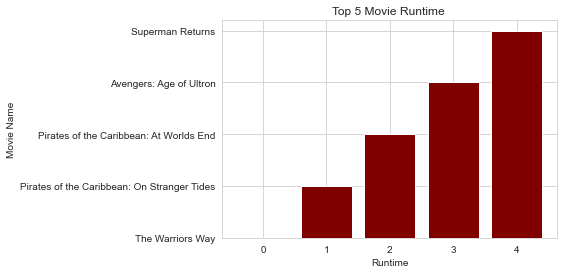

In [46]:
plt.bar(ypos,lst, color=(0.5,0.0,0.0,1.0))
plt.title('Top 5 Movie Runtime ')
plt.xlabel('Runtime')
plt.ylabel('Movie Name');


# 7. What Are The Movies With The Highest Budgets ?

In [47]:
title = ['The Warriors Way', 'Pirates of the Caribbean: On Stranger Tides','Pirates of the Caribbean: At Worlds End','Avengers: Age of Ultron','Superman Returns']
budget= [425000000, 380000000,300000000,280000000,270000000] 
df = pd.DataFrame(list(zip(title, budget)),columns =['ORIGINAL TITLE','BUDGET' ])
df

ORIGINAL TITLE     BUDGET
0                             The Warriors Way  425000000
1  Pirates of the Caribbean: On Stranger Tides  380000000
2      Pirates of the Caribbean: At Worlds End  300000000
3                      Avengers: Age of Ultron  280000000
4                             Superman Returns  270000000

In [48]:
fig = px.histogram(data_frame=df, x="BUDGET",y="ORIGINAL TITLE",title="Movie Budget",opacity=0.8)
fig.show()